In [200]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates


# Read the filtered data and merge two tables
(Filtered data: all dates would be the first of the month, like YYYY/MM/01) 

In [201]:
# Read food_cpi_filtered file
cpi_df= pd.read_csv("food_cpi_filtered_match.csv")
cpi_df.head()

,Date,CPI
0,1995-01-01,147.0
1,1995-02-01,147.7
2,1995-03-01,147.1
3,1995-04-01,148.7
4,1995-05-01,148.7


In [202]:
cpi_df.dtypes

Date     object
CPI     float64
dtype: object

In [203]:
cpi_df["Date"]=pd.to_datetime(cpi_df["Date"])

In [204]:
cpi_df.dtypes

Date    datetime64[ns]
CPI            float64
dtype: object

In [205]:
# Read gas_prices_filtered_match file
gas_df=pd.read_csv("gas_prices_filtered_match.csv")
gas_df.head()

,Date,all_grades_all_formulation,all_grades_conventional,all_grades_reformulated,regular_all_formulation,regular_conventional,regular_reformulated,midgrade_all_formulation,midgrade_conventional,midgrade_reformulated,premium_all_formulation,premium_conventional,premium_reformulated,no_2_diesel
0,1995-01-01,1.127,1.104,1.231,1.079,1.063,1.167,1.170,1.159,1.298,1.272,1.250,1.386,1.104
1,1995-02-01,1.124,1.103,1.218,1.076,1.062,1.159,1.169,1.157,1.288,1.270,1.250,1.368,1.086
2,1995-03-01,1.123,1.103,1.209,1.076,1.063,1.149,1.167,1.157,1.275,1.263,1.244,1.358,1.089
3,1995-04-01,1.133,1.116,1.198,1.087,1.077,1.140,1.174,1.167,1.266,1.270,1.255,1.350,1.094
4,1995-05-01,1.194,1.181,1.242,1.148,1.141,1.188,1.236,1.234,1.305,1.332,1.323,1.389,1.119


In [206]:
gas_df["Date"]=pd.to_datetime(cpi_gas_df["Date"])

In [207]:
gas_df["Date"].dtypes

dtype('<M8[ns]')

In [208]:
# Merge the two dataframe
cpi_gas_df=cpi_df.merge(gas_df,on="Date",how="inner")
cpi_gas_df.tail()


,Date,CPI,all_grades_all_formulation,all_grades_conventional,all_grades_reformulated,regular_all_formulation,regular_conventional,regular_reformulated,midgrade_all_formulation,midgrade_conventional,midgrade_reformulated,premium_all_formulation,premium_conventional,premium_reformulated,no_2_diesel
308,2020-09-01,251.303,2.302,2.193,2.518,2.211,2.122,2.405,2.624,2.481,2.836,2.872,2.758,3.008,2.435
309,2020-10-01,251.478,2.262,2.161,2.464,2.172,2.091,2.349,2.583,2.442,2.793,2.833,2.723,2.965,2.387
310,2020-11-01,251.241,2.204,2.092,2.430,2.112,2.021,2.314,2.533,2.378,2.765,2.786,2.661,2.936,2.372
311,2020-12-01,252.009,2.246,2.133,2.469,2.156,2.063,2.355,2.567,2.412,2.798,2.820,2.694,2.968,2.526
312,2021-01-01,252.270,2.336,2.227,2.549,2.249,2.160,2.437,2.639,2.484,2.867,2.895,2.771,3.042,2.640


# Exploring the data
Create three line graphs for CPI, gas price and CPI& gas price

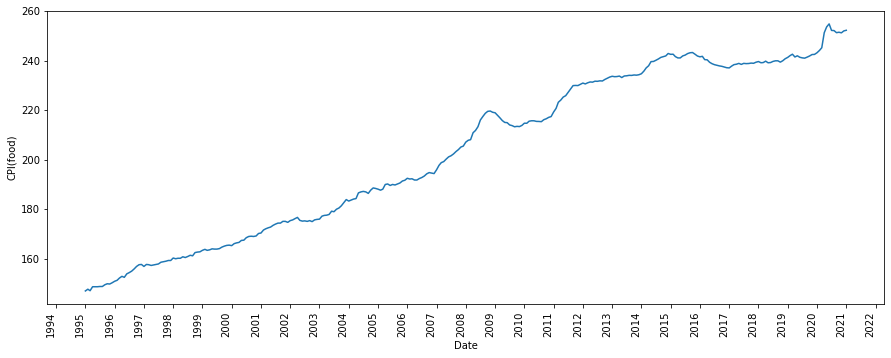

In [209]:
import numpy as np
# See the trend of food_cpi 
x_axis=cpi_df["Date"]
y_axis=cpi_df["CPI"]
plt.subplots(figsize=(15,6))
plt.plot(x_axis,y_axis)
plt.xlabel("Date")
plt.ylabel("CPI(food)")

locator = mdates.YearLocator()
plt.gca().xaxis.set_major_locator(locator)

plt.gcf().autofmt_xdate()
plt.xticks(rotation = 90)
plt.show()

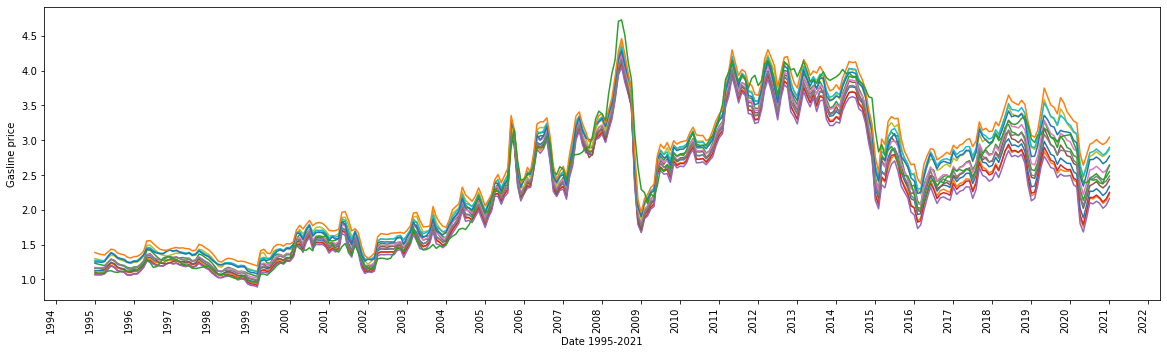

In [210]:
# See the trend of gas_price
x_axis=gas_df["Date"]
A1_axis=gas_df["all_grades_all_formulation"]
A2_axis=gas_df["all_grades_conventional"]
A3_axis=gas_df["all_grades_reformulated"]
R1_axis=gas_df["regular_all_formulation"]
R2_axis=gas_df["regular_conventional"]
R3_axis=gas_df["regular_reformulated"]
M1_axis=gas_df["midgrade_all_formulation"]
M2_axis=gas_df["midgrade_conventional"]
M3_axis=gas_df["midgrade_reformulated"]
P1_axis=gas_df["premium_all_formulation"]
P2_axis=gas_df["premium_conventional"]
P3_axis=gas_df["premium_reformulated"]
D_axis=gas_df["no_2_diesel"]
plt.subplots(figsize=(20,6))
plt.plot(x_axis,A1_axis)
plt.plot(x_axis,A2_axis)
plt.plot(x_axis,A3_axis)
plt.plot(x_axis,R1_axis)
plt.plot(x_axis,R2_axis)
plt.plot(x_axis,R3_axis)
plt.plot(x_axis,M1_axis)
plt.plot(x_axis,M2_axis)
plt.plot(x_axis,M3_axis)
plt.plot(x_axis,P1_axis)
plt.plot(x_axis,P2_axis)
plt.plot(x_axis,P3_axis)
plt.plot(x_axis,D_axis)
plt.xlabel("Date 1995-2021")
plt.ylabel("Gasline price")

locator = mdates.YearLocator()
plt.gca().xaxis.set_major_locator(locator)

plt.gcf().autofmt_xdate()
plt.xticks(rotation = 90)
plt.show()

CPI is in hundreds so we divid it with 100 and 10 - manually scale it to the level of gas price. Then we put them in the graph(s) to see the trend of these two data.

In [211]:
# Add one column call CPI_scaled divide CPI with 10
cpi_gas_df["CPI_scaled"]=cpi_gas_df["CPI"]/10
cpi_gas_df[["CPI_scaled"]].head()

,CPI_scaled
0,14.70
1,14.77
2,14.71
3,14.87
4,14.87


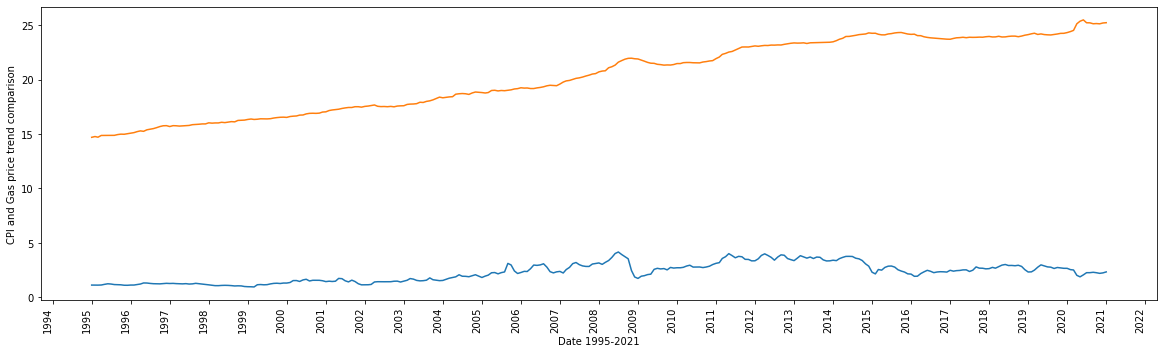

In [212]:
# Grab one oil type "all_grades_all_formulation" compare with CPI 
# Divide CPI with 10
x_axis=cpi_gas_df["Date"]
y1_axis=cpi_gas_df["all_grades_all_formulation"]
y2_axis=cpi_gas_df["CPI_scaled"]
plt.subplots(figsize=(20,6))
plt.plot(x_axis,y1_axis)
plt.plot(x_axis,y2_axis)
plt.xlabel("Date 1995-2021")
plt.ylabel("CPI and Gas price trend comparison")
locator = mdates.YearLocator()
plt.gca().xaxis.set_major_locator(locator)

plt.gcf().autofmt_xdate()
plt.xticks(rotation = 90)
plt.show()

In [213]:
# Change CPI_scaled  
# Divide CPI with 100
cpi_gas_df["CPI_scaled"]=cpi_gas_df["CPI"]/100
cpi_gas_df[["CPI_scaled"]].head()

,CPI_scaled
0,1.470
1,1.477
2,1.471
3,1.487
4,1.487


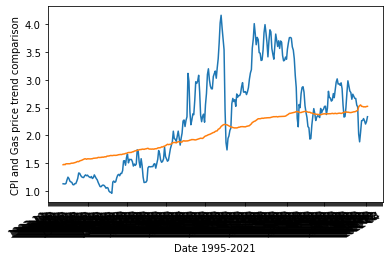

In [214]:
# Grab one oil type "all_grades_all_formulation" compare with CPI - when we divide CPI with 100
x_axis=cpi_gas_df["Date"]
y1_axis=cpi_gas_df["all_grades_all_formulation"]
y2_axis=cpi_gas_df["CPI_scaled"]
plt.plot(x_axis,y1_axis)
plt.plot(x_axis,y2_axis)
plt.xlabel("Date 1995-2021")
plt.ylabel("CPI and Gas price trend comparison")

locator = mdates.MonthLocator()
plt.gca().xaxis.set_major_locator(locator)

plt.gcf().autofmt_xdate()

plt.show()

# Machine Learning
We will have three models: SVM, Random Forest and neural network. The time frame for the datasets are from 1995-01 to 2021-01. These are monthly data. We will take out last 36 months (3 years) as testing data for prediction.

In [215]:
# Get first date from the dataframe
cpi_gas_df.head(1)

,Date,CPI,all_grades_all_formulation,all_grades_conventional,all_grades_reformulated,regular_all_formulation,regular_conventional,regular_reformulated,midgrade_all_formulation,midgrade_conventional,midgrade_reformulated,premium_all_formulation,premium_conventional,premium_reformulated,no_2_diesel,CPI_scaled
0,1995-01-01,147.0,1.127,1.104,1.231,1.079,1.063,1.167,1.17,1.159,1.298,1.272,1.25,1.386,1.104,1.47


In [216]:
# # Get last date from the dataframe
cpi_gas_df.tail(1)

,Date,CPI,all_grades_all_formulation,all_grades_conventional,all_grades_reformulated,regular_all_formulation,regular_conventional,regular_reformulated,midgrade_all_formulation,midgrade_conventional,midgrade_reformulated,premium_all_formulation,premium_conventional,premium_reformulated,no_2_diesel,CPI_scaled
312,2021-01-01,252.27,2.336,2.227,2.549,2.249,2.16,2.437,2.639,2.484,2.867,2.895,2.771,3.042,2.64,2.5227


Later will use the date to determine our training and test sets

## First model - Random Forest Regressor

In [395]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import pandas as pd
from sklearn.model_selection import cross_val_score
#import tensorflow as tf

In [380]:
# Define our features (X) and outcome(y)
X=cpi_gas_df.drop(["CPI","CPI_scaled","Date"],1)
y=cpi_gas_df["CPI"]

C:\Users\julie\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [381]:
y

0      147.000
1      147.700
2      147.100
3      148.700
4      148.700
        ...   
308    251.303
309    251.478
310    251.241
311    252.009
312    252.270
Name: CPI, Length: 313, dtype: float64

In [382]:
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import precision_score


In [383]:
X.iloc[:-22].head(5)

,all_grades_all_formulation,all_grades_conventional,all_grades_reformulated,regular_all_formulation,regular_conventional,regular_reformulated,midgrade_all_formulation,midgrade_conventional,midgrade_reformulated,premium_all_formulation,premium_conventional,premium_reformulated,no_2_diesel
0,1.127,1.104,1.231,1.079,1.063,1.167,1.170,1.159,1.298,1.272,1.250,1.386,1.104
1,1.124,1.103,1.218,1.076,1.062,1.159,1.169,1.157,1.288,1.270,1.250,1.368,1.086
2,1.123,1.103,1.209,1.076,1.063,1.149,1.167,1.157,1.275,1.263,1.244,1.358,1.089
3,1.133,1.116,1.198,1.087,1.077,1.140,1.174,1.167,1.266,1.270,1.255,1.350,1.094
4,1.194,1.181,1.242,1.148,1.141,1.188,1.236,1.234,1.305,1.332,1.323,1.389,1.119


In [384]:
# Split the training and test set
X_train = X.iloc[:-22].values
y_train=y.iloc[:-22].values
X_test = X.iloc[-22:].values
y_test=y.iloc[-22:].values


In [385]:
# from sklearn import preprocessing
# from sklearn import utils

# #convert y values to categorical values
# lab = preprocessing.LabelEncoder()
# y_train_transformed = lab.fit_transform(y_train)
# y_test_transformed = lab.fit_transform(y_test)
# #view transformed values
# print(y_train_transformed)



In [386]:
# print(y_test_transformed)

In [387]:
# # Create StandardScaler instance and Fit the scaler
# scaler=StandardScaler()
# scaler.fit(X_train)

In [388]:
# Scale the data
#X_train_scaled=scaler.transform(X_train)
#X_test_scaled=scaler.transform(X_test)

In [389]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
print(rfr)

RandomForestRegressor()


In [391]:
rfr.fit(X_train, y_train)

score = rfr.score(X_train, y_train)
print("R-squared:", score) 

R-squared: 0.9892383982140647


In [406]:
# Predict last 22 months CPI
y_pred=rfr.predict(X_test)
y_pred

array([237.90198, 237.46747, 238.25904, 239.94878, 239.37145, 239.49353,
       239.63464, 239.77939, 239.44375, 238.94723, 240.48159, 239.98041,
       239.9224 , 232.38402, 240.07498, 238.74394, 238.74795, 239.05552,
       238.74172, 238.71256, 239.30433, 240.04707])

### Another example for RandomForestRegressor
https://www.kaggle.com/code/jamieleech/random-forest-time-series-forecasting/notebook

In [325]:
from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

In [326]:
# transform a time series dataset into a supervised learning dataset
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols = list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
    # put it all together
    agg = concat(cols, axis=1)
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg.values

In [327]:
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
    return data[:-n_test, :], data[-n_test:, :]

In [328]:
# fit an random forest model and make a one step prediction
def random_forest_forecast(train, testX):
    # transform list into array
    train = asarray(train)
    # split into input and output columns
    trainX, trainy = train[:, :-1], train[:, -1]
    # fit model
    model = RandomForestRegressor(n_estimators=1000)
    model.fit(trainX, trainy)
    # make a one-step prediction
    yhat = model.predict([testX])
    return yhat[0]

In [329]:
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test):
    predictions = list()
    # split dataset
    train, test = train_test_split(data, n_test)
    # seed history with training dataset
    history = [x for x in train]
    # step over each time-step in the test set
    for i in range(len(test)):
        # split test row into input and output columns
        testX, testy = test[i, :-1], test[i, -1]
        # fit model on history and make a prediction
        yhat = random_forest_forecast(history, testX)
        
        # store forecast in list of predictions
        predictions.append(yhat)
        #print(f"Random forest predictive accuracy:{accuracy_score(testy,predictions)}")
        # add actual observation to history for the next loop
        history.append(test[i])
        # summarize progress
        print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
       

        
    # estimate prediction error
    error = mean_absolute_error(test[:, -1], predictions)
    return error, test[:, -1], predictions

In [330]:
# load the dataset
series = read_csv('food_cpi_filtered_match.csv', header=0, index_col=0)
values = series.values
# transform the time series data into supervised learning
data = series_to_supervised(values, n_in=13)

In [331]:
# evaluate
mae, y, yhat = walk_forward_validation(data, 12)
print('MAE: %.3f' % mae)

>expected=244.1, predicted=242.4
>expected=245.2, predicted=242.7
>expected=251.3, predicted=243.5
>expected=253.6, predicted=248.1
>expected=254.8, predicted=251.1
>expected=252.2, predicted=253.3
>expected=252.1, predicted=252.7
>expected=251.3, predicted=252.4
>expected=251.5, predicted=251.9
>expected=251.2, predicted=251.9
>expected=252.0, predicted=251.5
>expected=252.3, predicted=251.7
MAE: 2.181


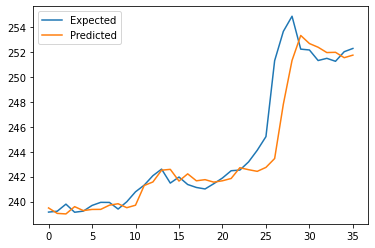

In [265]:
# plot expected vs predicted
pyplot.plot(y, label='Expected')
pyplot.plot(yhat, label='Predicted')
pyplot.legend()
pyplot.show()